In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

%matplotlib inline

In [29]:
digits = load_digits()

# Check number of images and lables
print ("Image data shape", digits.data.shape)
print ("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


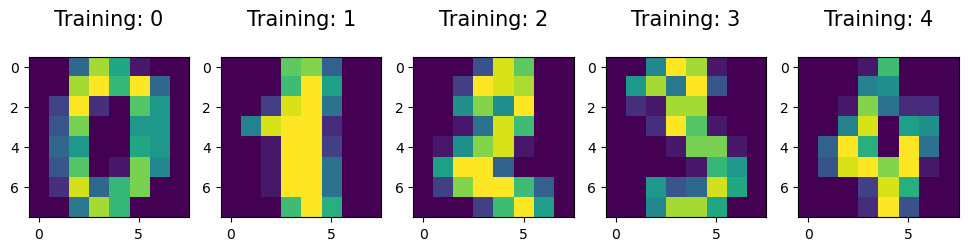

In [30]:
# Display some of the images
plt.figure(figsize=(12,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)))
    plt.title('Training: %i\n ' % label, fontsize = 15)

In [31]:
# Dividing the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1383, 64)
X_test shape:  (414, 64)
y_train shape:  (1383,)
y_test shape:  (414,)


In [32]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [33]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred[0:10]) # Print the first 10  predictions

[4 0 9 1 8 7 1 5 1 6]


In [34]:
# Determine model accuracy and f1_score
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)

Text(0.5, 1.0, 'Accuracy score: 0.9492753623188406 \n F1 score: 0.9498287063552878')

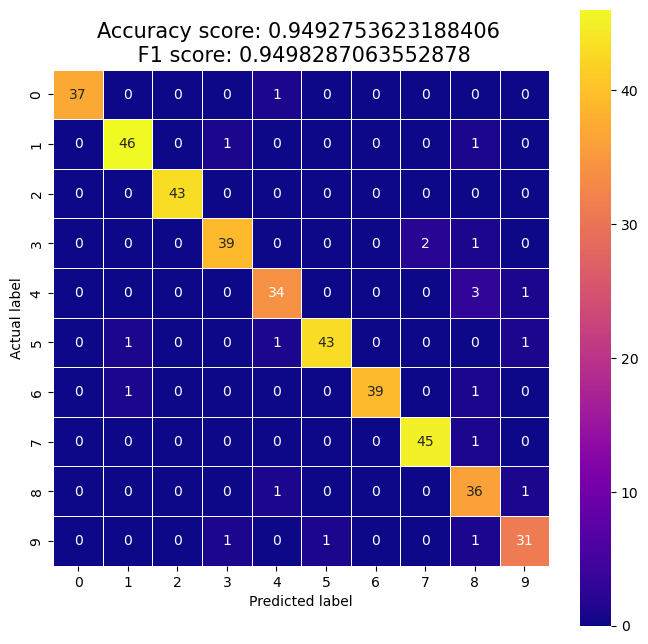

In [35]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, square=True, cmap='plasma')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0} \n F1 score: {1}'.format(accuracy, f1_score), size=15)

In [36]:
# Review how well the model classified random values

index = 0
classifiedIndex = []
misClassifiedIndex = []
for actual, predicted in zip(y_test, y_pred):
    if(actual==predicted):
        classifiedIndex.append(index)
    else:
        misClassifiedIndex.append(index)
    index += 1

print("Misclassified indices: ", misClassifiedIndex)

Misclassified indices:  [4, 16, 45, 49, 57, 63, 65, 66, 98, 115, 130, 137, 174, 179, 197, 204, 209, 277, 318, 351, 394]


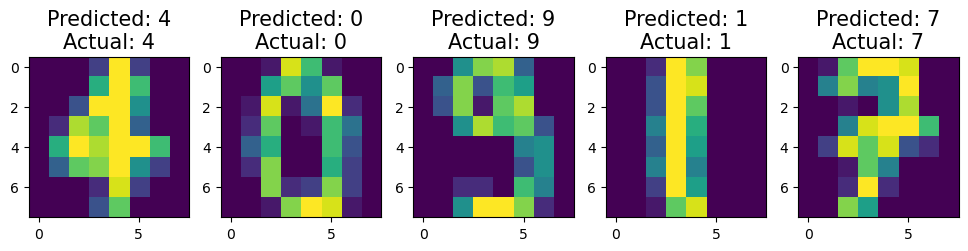

In [37]:
plt.figure(figsize=(12,4))
for plotindex, wrong in enumerate(classifiedIndex[0:5]):
    plt.subplot(1, 5, plotindex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)))
    plt.title('Predicted: {}\nActual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize = 15)